In [278]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df = pd.read_csv('Fytlyff_DS_Interview.csv')
df

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033
...,...,...,...,...,...,...,...,...,...,...
2155,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Bangalore,67299.0,21255.0,6984,1882
2156,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Chennai,430294.0,156510.0,46676,16703
2157,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


In [199]:
# df.rename(columns={'How_many_Landed_on_our_Page?':'col'},inplace=True)
# df.rename(columns={'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?':'col1'},inplace=True)

In [200]:
df

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033
...,...,...,...,...,...,...,...,...,...,...
2155,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Bangalore,67299.0,21255.0,6984,1882
2156,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Chennai,430294.0,156510.0,46676,16703
2157,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


In [201]:
def data_cleaning():
    df['How_many_Landed_on_our_Page?'].fillna(0,inplace=True)   
    df['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?'].fillna(0,inplace=True)
    df['Month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12},inplace=True)
    df['Where_Are_They_comming_from?'].replace({'Came_From_Google':'Google','Landed_on_the_page_Directly':'Direct_traffic'},inplace=True)
data_cleaning()
df


,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033
...,...,...,...,...,...,...,...,...,...,...
2155,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Bangalore,67299.0,21255.0,6984,1882
2156,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Chennai,430294.0,156510.0,46676,16703
2157,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


In [202]:
def descriptive_stats():
    mean = df.mean()
    meadian = df.median()
    qurtile =df.quantile()
    ftd = df.std()
    MobileWeb_or_Web=df['MobileWeb_or_Web'].unique()
    Type_of_Customers =df['Type_of_Customers?'].unique()
    Where_Are_They_comming_from = df['Where_Are_They_comming_from?'].unique()
    Which_Place_in_India = df['Which_Place_in_India?'].unique()
    
    return mean,meadian,qurtile,ftd,MobileWeb_or_Web,Type_of_Customers,Where_Are_They_comming_from , Which_Place_in_India



descriptive_stats()


/var/folders/tp/8hbdf_ds70zcw8vfb72n60gc0000gn/T/ipykernel_1180/234419622.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()
/var/folders/tp/8hbdf_ds70zcw8vfb72n60gc0000gn/T/ipykernel_1180/234419622.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meadian = df.median()
/var/folders/tp/8hbdf_ds70zcw8vfb72n60gc0000gn/T/ipykernel_1180/234419622.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ftd = df.std()


(Year                                                                                                                           2020.000000
 Month                                                                                                                             6.500000
 How_many_Landed_on_our_Page?                                                                                                 392247.442593
 How_many_Landed_on_the_our_Page_and_clicked_on_a_button?                                                                     179228.131944
 How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?                                        151072.456019
 How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?     59221.291204
 dtype: float64,
 Year                                                                                                                          2020.0
 Month   

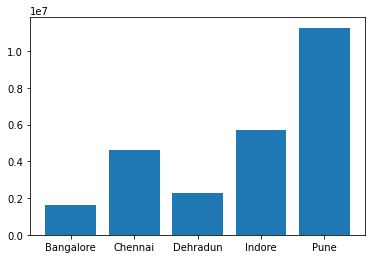

In [215]:
x = df["How_many_Landed_on_our_Page?"]
y = df['Which_Place_in_India?']
plt.bar(y,x)
plt.show()

In [228]:
df['How_many_Landed_on_our_Page?'].max()


11274131.0

In [227]:
df['Which_Place_in_India?'].max()

'Pune'

In [219]:
z = df['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?']/df['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?']

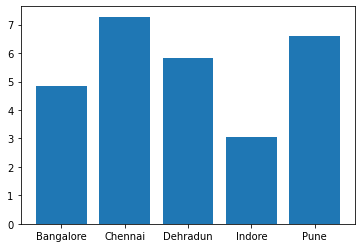

In [231]:
x = z
y = df['Which_Place_in_India?']
plt.bar(y,x)
plt.show()

In [224]:
z.max()

7.276789951593002

In [237]:
df1 = df.copy()

In [283]:
df2=df1.drop(['MobileWeb_or_Web','Type_of_Customers?','Year','Which_Place_in_India?','Where_Are_They_comming_from?'],axis=1)

In [284]:
df2

,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,1,0.0,0.0,56892,17178
1,1,0.0,0.0,41460,11916
2,1,0.0,0.0,55561,19461
3,1,0.0,0.0,320923,110667
4,1,0.0,0.0,220937,46033
...,...,...,...,...,...
2155,12,67299.0,21255.0,6984,1882
2156,12,430294.0,156510.0,46676,16703
2157,12,48713.0,27770.0,7515,2089
2158,12,593021.0,310836.0,161575,78465


In [285]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 5 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Month                                                                                                                      2160 non-null   int64  
 1   How_many_Landed_on_our_Page?                                                                                               2160 non-null   float64
 2   How_many_Landed_on_the_our_Page_and_clicked_on_a_button?                                                                   2160 non-null   float64
 3   How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?                                      2160 n

In [286]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [291]:
k=df2.corr()

In [292]:
y

0        17178
1        11916
2        19461
3       110667
4        46033
         ...  
2155      1882
2156     16703
2157      2089
2158     78465
2159     19441
Name: How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?, Length: 2160, dtype: int64

In [271]:
from sklearn.model_selection import train_test_split
X_train,Y_train,x_test,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [324]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
y_pred = reg.predict(x)
print(y_pred)

[33826.39276715 31621.76136251 33636.24473711 ... 17137.55704171
 67765.44496639 32785.1774232 ]


In [344]:
def MAPE(y ,y_pred):
    mape = np.mean(np.abs((y - y_pred)/y))*100
    return mape
MAPE(y,y_pred)


155.09996745615578

<AxesSubplot:xlabel='Which_Place_in_India?'>

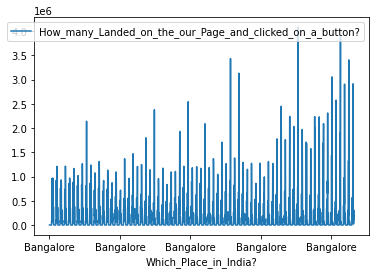

In [336]:
df1.plot(y = 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',x = 'Which_Place_in_India?')

<AxesSubplot:xlabel='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?'>

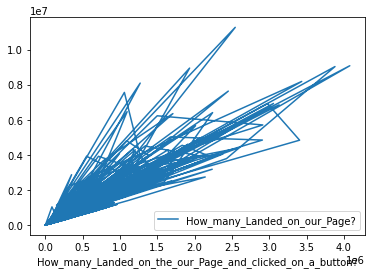

In [343]:
df2.plot(x = 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',y = 'How_many_Landed_on_our_Page?')